### 1. Read Json File

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load and read the JSON file to extract new parameters
import json

# Path to the JSON file with new parameters
json_path = 'Samoa_scenario3.json'

# Read the JSON file
with open(json_path, 'r') as file:
    df = json.load(file)

# Display the loaded parameters to confirm
df

{'Tmax': 60,
 'D': 16,
 'L': 1,
 'ls': 1,
 'le': 60,
 'α': 0.6,
 'β': 0.2,
 'γ': 0.3,
 'reduction_factor': 0.0,
 'Connectivity Matrix W': {'Outside World - AP, Aana Alofi - AP': 604,
  'Outside World - FP, Faasaleleaga - FP': 280,
  'Faasaleleaga - LR, Gagaemauga - LR': 827,
  'Gagaemauga - LR, Gagaifoumauga - LR': 413,
  'Gagaifoumauga - LR, Vaisigano - LR': 752,
  'Vaisigano - LR, Falealupo - LR': 221,
  'Falealupo - LR, Alataua i Sisifo - LR': 221,
  'Alataua i Sisifo - LR, Salega - LR': 378,
  'Salega - LR, Palauli & Satupaitea - LR': 717,
  'Palauli & Satupaitea - LR, Faasaleleaga - LR': 1668,
  'Faasaleleaga - LR, Aiga i le Tai - LR': 1176,
  'Aiga i le Tai - LR, Falelatai & Samatau - LR': 651,
  'Falelatai & Samatau - LR, Lefaga & Faleaseela - LR': 651,
  'Lefaga & Faleaseela - LR, Safata - LR': 898,
  'Safata - LR, Siumu - LR': 510,
  'Siumu - LR, Falealili - LR': 510,
  'Falealili - LR, Lotofaga - LR': 387,
  'Lotofaga - LR, Lepa - LR': 290,
  'Lepa - LR, Aleipata Itupa i Luga

In [3]:
connection = df['Connectivity Matrix W'].copy()
connection

{'Outside World - AP, Aana Alofi - AP': 604,
 'Outside World - FP, Faasaleleaga - FP': 280,
 'Faasaleleaga - LR, Gagaemauga - LR': 827,
 'Gagaemauga - LR, Gagaifoumauga - LR': 413,
 'Gagaifoumauga - LR, Vaisigano - LR': 752,
 'Vaisigano - LR, Falealupo - LR': 221,
 'Falealupo - LR, Alataua i Sisifo - LR': 221,
 'Alataua i Sisifo - LR, Salega - LR': 378,
 'Salega - LR, Palauli & Satupaitea - LR': 717,
 'Palauli & Satupaitea - LR, Faasaleleaga - LR': 1668,
 'Faasaleleaga - LR, Aiga i le Tai - LR': 1176,
 'Aiga i le Tai - LR, Falelatai & Samatau - LR': 651,
 'Falelatai & Samatau - LR, Lefaga & Faleaseela - LR': 651,
 'Lefaga & Faleaseela - LR, Safata - LR': 898,
 'Safata - LR, Siumu - LR': 510,
 'Siumu - LR, Falealili - LR': 510,
 'Falealili - LR, Lotofaga - LR': 387,
 'Lotofaga - LR, Lepa - LR': 290,
 'Lepa - LR, Aleipata Itupa i Luga - LR': 268,
 'Aleipata Itupa i Luga - LR, Aleipata Itupa i Lalo - LR': 268,
 'Aleipata Itupa i Lalo - LR, Vaa o Fonoti - LR': 281,
 'Vaa o Fonoti - LR, Ano

In [4]:
community = df['ports_according_communities'].copy()


In [5]:
n = df['n'].copy()
outside_world = {'Outside World': n.pop('Outside World')}
sorted_data = {k: n[k] for k in sorted(n)}
population = {**outside_world, **sorted_data}
population

{'Outside World': 8100000000,
 'Aana Alofi': 15939,
 'Aiga i le Tai': 5880,
 'Alataua i Sisifo': 1891,
 'Aleipata Itupa i Lalo': 4426,
 'Aleipata Itupa i Luga': 1338,
 'Anoamaa': 10085,
 'Faasaleleaga': 15290,
 'Falealili': 49580,
 'Falealupo': 11060,
 'Faleata': 36942,
 'Falelatai & Samatau': 32560,
 'Gagaemauga': 4136,
 'Gagaifoumauga': 4797,
 'Lefaga & Faleaseela': 4488,
 'Lepa': 1460,
 'Lotofaga': 19350,
 'Palauli & Satupaitea': 8338,
 'Safata': 7320,
 'Sagaga': 26869,
 'Salega': 3584,
 'Siumu': 2551,
 'Vaa o Fonoti': 1404,
 'Vaimauga': 31531,
 'Vaisigano': 3760}

### 2. Construct simulation locations and connections

In [6]:
def connections_to_locations(community, connection):
    port_to_location = {}
    for location, ports in community.items():
        for port in ports:
            port_to_location[port] = location

    location_connections = {}

    for key, value in connection.items():
        port1, port2 = key.split(',')
        loc1 = port_to_location.get(port1.strip(), None)
        loc2 = port_to_location.get(port2.strip(), None)


        if loc1 and loc2:
            sorted_locs = tuple(sorted([loc1, loc2]))

            if sorted_locs in location_connections:
                location_connections[sorted_locs] += value
            else:
                location_connections[sorted_locs] = value
    formatted_connections = {}
    for locations, flow in location_connections.items():
        loc1, loc2 = locations
        formatted_connections[f'{loc1},{loc2}'] = flow

    return formatted_connections

connection = connections_to_locations(community, connection)

connection

{'Aana Alofi,Outside World': 604,
 'Faasaleleaga,Outside World': 280,
 'Faasaleleaga,Gagaemauga': 827,
 'Gagaemauga,Gagaifoumauga': 413,
 'Gagaifoumauga,Vaisigano': 752,
 'Falealupo,Vaisigano': 221,
 'Alataua i Sisifo,Falealupo': 221,
 'Alataua i Sisifo,Salega': 378,
 'Palauli & Satupaitea,Salega': 717,
 'Faasaleleaga,Palauli & Satupaitea': 1668,
 'Aiga i le Tai,Faasaleleaga': 1226,
 'Aiga i le Tai,Falelatai & Samatau': 651,
 'Falelatai & Samatau,Lefaga & Faleaseela': 651,
 'Lefaga & Faleaseela,Safata': 898,
 'Safata,Siumu': 510,
 'Falealili,Siumu': 510,
 'Falealili,Lotofaga': 387,
 'Lepa,Lotofaga': 290,
 'Aleipata Itupa i Luga,Lepa': 268,
 'Aleipata Itupa i Lalo,Aleipata Itupa i Luga': 268,
 'Aleipata Itupa i Lalo,Vaa o Fonoti': 281,
 'Anoamaa,Vaa o Fonoti': 281,
 'Anoamaa,Vaimauga': 2017,
 'Faleata,Vaimauga': 6306,
 'Faleata,Sagaga': 5374,
 'Aana Alofi,Sagaga': 3188,
 'Aana Alofi,Aiga i le Tai': 1176}

In [7]:
community = population.copy()

### 3. Create Connectivity Matrix W

In [8]:
def connection_matrix(connection,community):
    """
    Creates two matrices from a dictionary of connections between communities. One matrix is binary (indicating presence
    or absence of a connection), and the other matrix records the volume of each connection.

    Args:
        connection (dict): A dictionary where keys are strings formatted as "Departure,Arrival" and values are 
                           integers representing the volume of the connection between the communities.
        community (dict): A dictionary of communities where keys are community names and values are the population
                          or other relevant attributes (although these values are not used in this function).

    Returns:
        tuple: A tuple containing two DataFrames:
               1. A binary connection matrix (pandas DataFrame) where each cell [i, j] is 1 if there is a connection
                  between community i and community j, and 0 otherwise.
               2. A volume connection matrix (pandas DataFrame) where each cell [i, j] contains the volume of the 
                  connection between community i and community j if one exists, otherwise 0.
    """
    # Extract unique community names as locations
    locations = list(community.keys())
    
    # Create a zero-initialized square matrix
    matrix_zero = np.zeros((len(locations), len(locations)), dtype=int)
    
    matrix_binary = pd.DataFrame(matrix_zero.copy(), index=locations, columns=locations)
    matrix_volume = pd.DataFrame(matrix_zero.copy(), index=locations, columns=locations)
    
    # Update the matrix based on connections
    for con, vol in connection.items():
        dep, ari = con.split(',')
        if dep in locations and ari in locations:
            # Set the connection to 1
            matrix_binary.loc[dep, ari] = 1
            matrix_binary.loc[ari, dep] = 1 # Bidirectional connection
            # Set the connection to volumn
            matrix_volume.loc[dep, ari] = vol
            matrix_volume.loc[ari, dep] = vol # Bidirectional connection
    
            
    return matrix_binary,matrix_volume


In [9]:
binary_matrix,volume_matrix = connection_matrix(connection,community)
    
binary_matrix

,Outside World,Aana Alofi,Aiga i le Tai,Alataua i Sisifo,Aleipata Itupa i Lalo,Aleipata Itupa i Luga,Anoamaa,Faasaleleaga,Falealili,Falealupo,...,Lepa,Lotofaga,Palauli & Satupaitea,Safata,Sagaga,Salega,Siumu,Vaa o Fonoti,Vaimauga,Vaisigano
Outside World,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Aana Alofi,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Aiga i le Tai,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Alataua i Sisifo,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
Aleipata Itupa i Lalo,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Aleipata Itupa i Luga,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Anoamaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
Faasaleleaga,1,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Falealili,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
Falealupo,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [10]:
volume_matrix

,Outside World,Aana Alofi,Aiga i le Tai,Alataua i Sisifo,Aleipata Itupa i Lalo,Aleipata Itupa i Luga,Anoamaa,Faasaleleaga,Falealili,Falealupo,...,Lepa,Lotofaga,Palauli & Satupaitea,Safata,Sagaga,Salega,Siumu,Vaa o Fonoti,Vaimauga,Vaisigano
Outside World,0,604,0,0,0,0,0,280,0,0,...,0,0,0,0,0,0,0,0,0,0
Aana Alofi,604,0,1176,0,0,0,0,0,0,0,...,0,0,0,0,3188,0,0,0,0,0
Aiga i le Tai,0,1176,0,0,0,0,0,1226,0,0,...,0,0,0,0,0,0,0,0,0,0
Alataua i Sisifo,0,0,0,0,0,0,0,0,0,221,...,0,0,0,0,0,378,0,0,0,0
Aleipata Itupa i Lalo,0,0,0,0,0,268,0,0,0,0,...,0,0,0,0,0,0,0,281,0,0
Aleipata Itupa i Luga,0,0,0,0,268,0,0,0,0,0,...,268,0,0,0,0,0,0,0,0,0
Anoamaa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,281,2017,0
Faasaleleaga,280,0,1226,0,0,0,0,0,0,0,...,0,0,1668,0,0,0,0,0,0,0
Falealili,0,0,0,0,0,0,0,0,0,0,...,0,387,0,0,0,0,510,0,0,0
Falealupo,0,0,0,221,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,221


### 4. Set up Outside World and Locations Initional SEIR statement

In [11]:

def seir_statement(day, inbound, community_seir):
    """
    Updates or initializes the SEIR model states for a community with additional inbound effects.

    Args:
        day (int): Current simulation day. If day == 1, initialize the SEIR model.
        inbound (list): A list containing the minimum and maximum expected inbound individuals,
                        and the exposure rate among them.
        community (dict): A dictionary of communities with their initial populations.
        expose_rate (float): The rate at which inbound individuals are exposed to the disease.

    Returns:
        pd.DataFrame: A DataFrame containing updated SEIR values and ratios for each community.
    """
    
    # Initialize or copy the community DataFrame
    
    
    if day == 1:
        # Initial locations and population
        community_seir['Outside World'] = 0
        community_seir = pd.DataFrame(list(community_seir.values()), index=community_seir.keys(), columns=['Population'])
        # Initialize SEIR columns
        community_seir['S'] = community_seir['Population']
        community_seir['E'] = 0
        community_seir['I'] = 0
        community_seir['R'] = 0
    
    else:
        # Assume community_seir is already a DataFrame
        community_seir = community_seir.copy()
        
    # Random inbound population between the specified bounds
    P = np.random.randint(inbound[0], inbound[1] + 1)
    E = int(P * inbound[2])  # Exposed individuals among inbound
    S = P - E                # Susceptible individuals among inbound
    I, R = 0, 0              # Initially, no infected or recovered in inbound

    # Update the 'Outside World' inbound directly in the DataFrame
        
    community_seir.loc['Outside World', 'Population'] += P
    community_seir.loc['Outside World', 'S'] = S
    community_seir.loc['Outside World', 'E'] = E
    community_seir.loc['Outside World', 'I'] = I
    community_seir.loc['Outside World', 'R'] = R

    # Calculate the population ratios of S, E, I, and R
    community_seir['S_ratio'] = community_seir['S'] / community_seir['Population']
    community_seir['E_ratio'] = community_seir['E'] / community_seir['Population']
    community_seir['I_ratio'] = community_seir['I'] / community_seir['Population']
    community_seir['R_ratio'] = community_seir['R'] / community_seir['Population']
    

    return community_seir


In [12]:
#seir_statement_record = {}
community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1
day=1
community_seir = seir_statement(day, inbound, community_seir)
#seir_statement_record[day] = community_seir
community_seir

,Population,S,E,I,R,S_ratio,E_ratio,I_ratio,R_ratio
Outside World,390,351,39,0,0,0.9,0.1,0.0,0.0
Aana Alofi,15939,15939,0,0,0,1.0,0.0,0.0,0.0
Aiga i le Tai,5880,5880,0,0,0,1.0,0.0,0.0,0.0
Alataua i Sisifo,1891,1891,0,0,0,1.0,0.0,0.0,0.0
Aleipata Itupa i Lalo,4426,4426,0,0,0,1.0,0.0,0.0,0.0
Aleipata Itupa i Luga,1338,1338,0,0,0,1.0,0.0,0.0,0.0
Anoamaa,10085,10085,0,0,0,1.0,0.0,0.0,0.0
Faasaleleaga,15290,15290,0,0,0,1.0,0.0,0.0,0.0
Falealili,49580,49580,0,0,0,1.0,0.0,0.0,0.0
Falealupo,11060,11060,0,0,0,1.0,0.0,0.0,0.0


In [13]:
#day = 2
#community_seir = seir_statement(2, inbound, community_seir)
#seir_statement_record[day] = community_seir
#community_seir


In [14]:
#seir_statement_record[1]

In [15]:
#seir_statement_record[2]

### 5. Migration between locations

In [16]:
def migration(community_seir, binary_matrix, volume_matrix):
    """
    Simulate migration between communities based on connectivity and volume limits,
    with special consideration for migrations involving 'Outside World'. This function
    randomly selects individuals for migration based on available SEIR proportions and ensures
    no negative populations occur due to migration. The migration is simulated without replacement,
    maintaining a realistic population dynamics.

    Args:
        community_seir (pd.DataFrame): A DataFrame containing the current SEIR values for each community,
                                       indexed by community names with columns for 'S', 'E', 'I', 'R'.
        binary_matrix (pd.DataFrame): A DataFrame indicating connectivity between communities,
                                      where 1 represents a connection and 0 no connection. It is indexed
                                      and column-labeled by community names.
        volume_matrix (pd.DataFrame): A DataFrame indicating the maximum number of individuals
                                      that can migrate between connected communities, also indexed
                                      and column-labeled by community names. For migrations involving
                                      'Outside World', this volume is set to the total SEIR population
                                      of 'Outside World'.

    Returns:
        tuple: A tuple containing two pd.DataFrame:
               1. Updated community_seir DataFrame after migration adjustments.
               2. Migration_df DataFrame detailing the number of individuals (for each SEIR category)
                  who migrated out of and into each community.

    The function performs migration by calculating the maximum allowable migrants (either as specified
    in the volume matrix or as the total population for migrations involving 'Outside World'). It then
    randomly selects individuals to migrate based on SEIR proportions without replacement, updates the
    SEIR statuses for both source and target communities, and tracks these migrations in a detailed DataFrame.
    """
    communities = community_seir.index
    
    migration_df = pd.DataFrame(0, index=communities, columns=['S_out', 'E_out', 'I_out', 'R_out', 'S_in', 'E_in', 'I_in', 'R_in'])
    
    for source in communities:
        for target in communities:
            if source != target and binary_matrix.loc[source, target] == 1:
                if source == 'Outside World':
                    max_migrants = community_seir.loc['Outside World', ['S', 'E', 'I', 'R']].sum()
                    outbound =  max_migrants.copy()
                if target == 'Outside World':
                    max_migrants = outbound
                else:
                    max_migrants = int(volume_matrix.loc[source, target] * 0.8) #We assume that wi is 80% of max daily transportation schedule.

                available_seir = community_seir.loc[source, ['S', 'E', 'I', 'R']].clip(lower=0)
                total_available = available_seir.sum()
                
                if total_available > 0 and max_migrants > 0:
                    max_migrants = min(int(max_migrants), int(total_available))
                    
                    # Generate a flat array of population indices based on SEIR proportions
                    repeats = available_seir.astype(int).values  # Ensure the counts are integers
                    population_indices = np.repeat(['S', 'E', 'I', 'R'], repeats)
                    
                    # Randomly select individuals without replacement
                    if max_migrants > len(population_indices):
                        max_migrants = len(population_indices)  # Adjust max_migrants if larger than population_indices
                    selected_indices = np.random.choice(population_indices, size=max_migrants, replace=False)
                    
                    # Count the number of each SEIR type selected
                    selected_counts = pd.Series(selected_indices).value_counts()
                    
                    # Update migration records and community SEIR data
                    for seir_type in ['S', 'E', 'I', 'R']:
                        migrants_count = selected_counts.get(seir_type, 0)
                        migration_df.loc[source, seir_type + '_out'] += migrants_count
                        migration_df.loc[target, seir_type + '_in'] += migrants_count
                        community_seir.loc[source, seir_type] -= migrants_count
                        community_seir.loc[target, seir_type] += migrants_count
    # Calculate the population ratios of S, E, I, and R
    community_seir['S_ratio'] = community_seir['S'] / community_seir['Population']
    community_seir['E_ratio'] = community_seir['E'] / community_seir['Population']
    community_seir['I_ratio'] = community_seir['I'] / community_seir['Population']
    community_seir['R_ratio'] = community_seir['R'] / community_seir['Population']
    
    return community_seir, migration_df


In [17]:
community_seir, migration_df = migration(community_seir,binary_matrix,volume_matrix)
community_seir

,Population,S,E,I,R,S_ratio,E_ratio,I_ratio,R_ratio
Outside World,390,0,0,0,0,0.000000,0.000000,0.0,0.0
Aana Alofi,15939,16299,30,0,0,1.022586,0.001882,0.0,0.0
Aiga i le Tai,5880,5879,1,0,0,0.999830,0.000170,0.0,0.0
Alataua i Sisifo,1891,1891,0,0,0,1.000000,0.000000,0.0,0.0
Aleipata Itupa i Lalo,4426,4426,0,0,0,1.000000,0.000000,0.0,0.0
Aleipata Itupa i Luga,1338,1338,0,0,0,1.000000,0.000000,0.0,0.0
Anoamaa,10085,10085,0,0,0,1.000000,0.000000,0.0,0.0
Faasaleleaga,15290,15289,1,0,0,0.999935,0.000065,0.0,0.0
Falealili,49580,49580,0,0,0,1.000000,0.000000,0.0,0.0
Falealupo,11060,11060,0,0,0,1.000000,0.000000,0.0,0.0


In [18]:
# Still has problem in Outside World in population
migration_df

,S_out,E_out,I_out,R_out,S_in,E_in,I_in,R_in
Outside World,351,39,0,0,0,0,0,0
Aana Alofi,3481,9,0,0,3841,39,0,0
Aiga i le Tai,2438,2,0,0,2437,3,0,0
Alataua i Sisifo,478,0,0,0,478,0,0,0
Aleipata Itupa i Lalo,438,0,0,0,438,0,0,0
Aleipata Itupa i Luga,428,0,0,0,428,0,0,0
Anoamaa,1837,0,0,0,1837,0,0,0
Faasaleleaga,2975,0,0,0,2974,1,0,0
Falealili,717,0,0,0,717,0,0,0
Falealupo,352,0,0,0,352,0,0,0


### 6. Infection inside locations

In [19]:
def infection(α, β, γ, community_seir):
    """
    Simulate the infection process within each community based on the SEIR model.

    Args:
        α (float): Transmission rate, the probability of susceptible individuals becoming exposed.
        β (float): Recovery rate, the probability of infected individuals recovering.
        γ (float): Progression rate, the probability of exposed individuals becoming infectious.
        community_seir (pd.DataFrame): A DataFrame containing the SEIR values for each community,
                                       indexed by community names with columns for 'S', 'E', 'I', 'R' and their ratios.

    Returns:
        pd.DataFrame: Updated DataFrame after applying the infection dynamics to each community.
    """
    # Create a copy to update the community SEIR values without altering the original during iteration
    updated_seir = community_seir.copy()
    
    for index, row in updated_seir.iterrows():
        n = row['S'] + row['E'] + row['I'] + row['R']
        if n > 0:
            S, E, I, R = row['S'], row['E'], row['I'], row['R']
            δ_SE = np.random.binomial(S, α * I / n if I > 0 else 0)  # Susceptible to Exposed
            δ_EI = np.random.binomial(E, γ)  # Exposed to Infected
            δ_IR = np.random.binomial(I, β)  # Infected to Recovered
            
            # Update the SEIR counts
            updated_seir.at[index, 'S'] = S - δ_SE
            updated_seir.at[index, 'E'] = E + δ_SE - δ_EI
            updated_seir.at[index, 'I'] = I + δ_EI - δ_IR
            updated_seir.at[index, 'R'] = R + δ_IR

            # Update the ratios
            total_pop = updated_seir.at[index, 'S'] + updated_seir.at[index, 'E'] + updated_seir.at[index, 'I'] + updated_seir.at[index, 'R']
            updated_seir.at[index, 'S_ratio'] = updated_seir.at[index, 'S'] / total_pop
            updated_seir.at[index, 'E_ratio'] = updated_seir.at[index, 'E'] / total_pop
            updated_seir.at[index, 'I_ratio'] = updated_seir.at[index, 'I'] / total_pop
            updated_seir.at[index, 'R_ratio'] = updated_seir.at[index, 'R'] / total_pop
    
    return updated_seir


In [20]:
α = 0.60  # Transmission rate
β = 0.20  # Recovery rate
γ = 0.30  # Progression rate from exposed to infectious

x_updated = infection(α, β, γ, community_seir)
x_updated


,Population,S,E,I,R,S_ratio,E_ratio,I_ratio,R_ratio
Outside World,390,0,0,0,0,0.000000,0.000000,0.000000,0.0
Aana Alofi,15939,16299,24,6,0,0.998163,0.001470,0.000367,0.0
Aiga i le Tai,5880,5879,1,0,0,0.999830,0.000170,0.000000,0.0
Alataua i Sisifo,1891,1891,0,0,0,1.000000,0.000000,0.000000,0.0
Aleipata Itupa i Lalo,4426,4426,0,0,0,1.000000,0.000000,0.000000,0.0
Aleipata Itupa i Luga,1338,1338,0,0,0,1.000000,0.000000,0.000000,0.0
Anoamaa,10085,10085,0,0,0,1.000000,0.000000,0.000000,0.0
Faasaleleaga,15290,15289,1,0,0,0.999935,0.000065,0.000000,0.0
Falealili,49580,49580,0,0,0,1.000000,0.000000,0.000000,0.0
Falealupo,11060,11060,0,0,0,1.000000,0.000000,0.000000,0.0


In [21]:
def lockdown(location, binary_matrix):
    if location in binary_matrix.index:
        location.value ==0
    else:
        print("Location missing")    

### 7. Simulation

In [22]:
Tmax = 365

α = 0.60  # Transmission rate
β = 0.20  # Recovery rate
γ = 0.30  # Progression rate from exposed to infectious

seir_history = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, inbound, community_seir)

    community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix)
    #print(migration_df)
    
    community_seir = infection(α, β, γ, community_seir)
    seir_history[day] = community_seir

    #print("Day", day, ":")
    #print(community_seir)
    

In [23]:
#seir_history

In [24]:


def seir_plot(method_start, method_end, seir_history):
    all_days = []
    for day, df in seir_history.items():
        df['Day'] = day
        all_days.append(df.copy())

    full_data = pd.concat(all_days)
    national_seir = full_data.groupby('Day').sum()
    national_seir['Total'] = national_seir[['S', 'E', 'I', 'R']].sum(axis=1)

    for compartment in ['S', 'E', 'I', 'R']:
        national_seir[f'{compartment}_ratio'] = national_seir[compartment] / national_seir['Total']
        
    marker_every = 5
    
    colors = {
    'S': 'blue',   # Susceptible - Blue
    'E': 'orange', # Exposed - Orange
    'I': 'red',    # Infected - Red
    'R': 'green'   # Recovered - Green
    }

    plt.figure(figsize=(14, 7))
    # Plot with different markers for each compartment
    plt.plot(national_seir.index, national_seir['S_ratio'], label='S - Susceptible', marker='o', linestyle='-', markevery=marker_every, color=colors['S'])  # Circle markers
    plt.plot(national_seir.index, national_seir['E_ratio'], label='E - Exposed', marker='s', linestyle='-', markevery=marker_every, color=colors['E'])  # Square markers
    plt.plot(national_seir.index, national_seir['I_ratio'], label='I - Infected', marker='v', linestyle='-', markevery=marker_every, color=colors['I'])  # Triangle_down markers
    plt.plot(national_seir.index, national_seir['R_ratio'], label='R - Recovered', marker='^', linestyle='-', markevery=marker_every, color=colors['R'])  # Triangle_up markers

    # Highlight the intervention period
    plt.axvspan(method_start, method_end, color='grey', alpha=0.5, label='Intervention Period')

    plt.title('National SEIR Ratios Over Time')
    plt.xlabel('Day')
    plt.ylabel('Ratio')
    plt.ylim(0, 1)  
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# seir_plot(30, 50, seir_history) - This will shade the period from day 30 to day 50



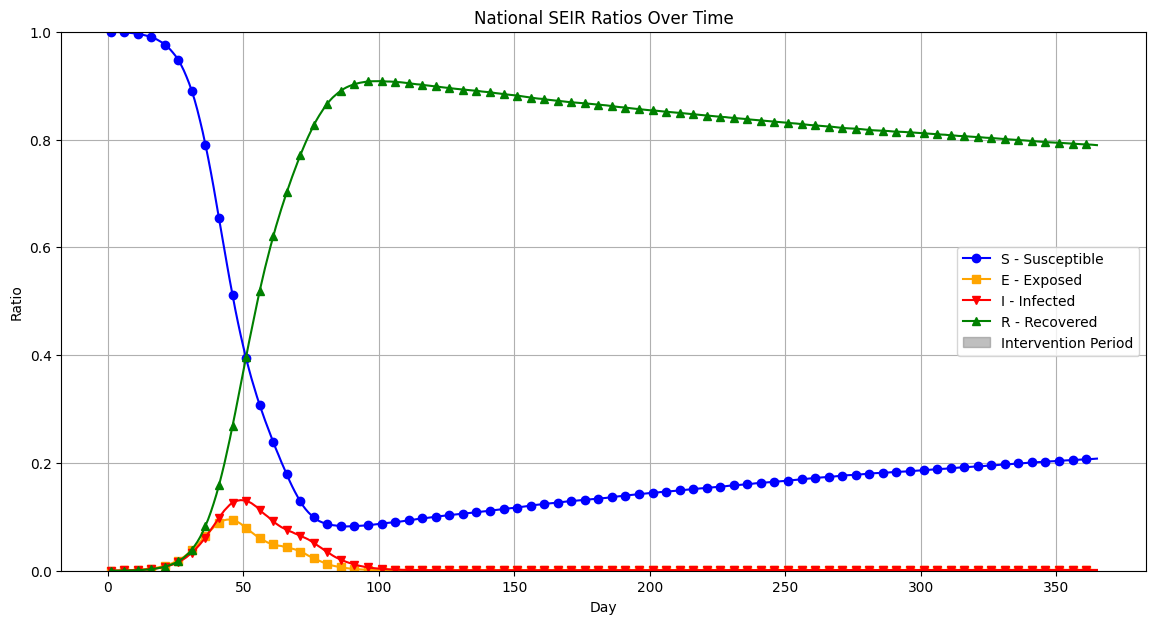

In [25]:
seir_plot(method_start=None, method_end=None, seir_history=seir_history)

### 9. Lockdown Method

In [26]:
def temporary_lockdown(day, binary_matrix, volume_matrix, lockdown_communities, ls, le, method='binary', reduction_factor=0.5, original_matrices=None):
    """
    Temporarily apply or lift lockdown measures based on the current simulation day, and restore matrices after lockdown ends.

    Args:
        day (int): Current simulation day.
        binary_matrix (pd.DataFrame): Binary connection matrix of communities.
        volume_matrix (pd.DataFrame): Volume matrix indicating the number of people that can migrate between communities.
        lockdown_communities (list): List of communities to lockdown.
        ls (int): Lockdown start day.
        le (int): Lockdown end day.
        method (str): 'binary' to cut connections, 'volume' to reduce traffic.
        reduction_factor (float): Factor by which to reduce the traffic, used only if method is 'volume'.
        original_matrices (dict): A dictionary containing original 'binary' and 'volume' matrices to restore after lockdown.

    Returns:
        tuple: Updated binary_matrix, volume_matrix
    """
    
    if ls <= day <= le:
        # Apply lockdown
        if method == 'binary':
            for community in lockdown_communities:
                for target in binary_matrix.columns:
                    if community != target:
                        binary_matrix.loc[community, target] = 0
                        binary_matrix.loc[target, community] = 0
        elif method == 'volume':
            for community in lockdown_communities:
                for target in volume_matrix.columns:
                    if community != target:
                        volume_matrix.loc[community, target] = int(volume_matrix.loc[community, target] * reduction_factor)
                        volume_matrix.loc[target, community] = int(volume_matrix.loc[target, community] * reduction_factor)
    elif day > le:
        # Restore original state after lockdown
        if original_matrices:
            binary_matrix.update(original_matrices['binary'])
            volume_matrix.update(original_matrices['volume'])

    return binary_matrix, volume_matrix





In [27]:
Tmax = 365

α = 0.30  # Transmission rate
β = 0.10  # Recovery rate
γ = 0.50  # Progression rate from exposed to infectious

ls = 7 # Lockdown start day
le = 250 # Lockdown end day
lockdown_communities = ['Outside World'] # Lockdown location


lockdown_seir_history = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

original_binary_matrix = binary_matrix.copy()
original_volume_matrix = volume_matrix.copy()
original_matrices = {'binary': original_binary_matrix, 'volume': original_volume_matrix}

for day in range(1, Tmax + 1):
        lockdown_binary_matrix, lockdown_volume_matrix = temporary_lockdown(day, binary_matrix, volume_matrix, lockdown_communities, ls, le, method='binary', reduction_factor=0.5, original_matrices=original_matrices)

        community_seir = seir_statement(day, inbound, community_seir)
        community_seir, migration_df = migration(community_seir, lockdown_binary_matrix, lockdown_volume_matrix)
        print(migration_df)
        community_seir = infection(α, β, γ, community_seir)
        lockdown_seir_history[day] = community_seir

 

                       S_out  E_out  I_out  R_out  S_in  E_in  I_in  R_in
Outside World            256     28      0      0     0     0     0     0
Aana Alofi              3488      2      0      0  3746    28     0     0
Aiga i le Tai           2440      0      0      0  2439     1     0     0
Alataua i Sisifo         478      0      0      0   478     0     0     0
Aleipata Itupa i Lalo    438      0      0      0   438     0     0     0
Aleipata Itupa i Luga    428      0      0      0   428     0     0     0
Anoamaa                 1837      0      0      0  1837     0     0     0
Faasaleleaga            2975      0      0      0  2975     0     0     0
Falealili                717      0      0      0   717     0     0     0
Falealupo                352      0      0      0   352     0     0     0
Faleata                 9343      0      0      0  9343     0     0     0
Falelatai & Samatau     1040      0      0      0  1040     0     0     0
Gagaemauga               991      0   

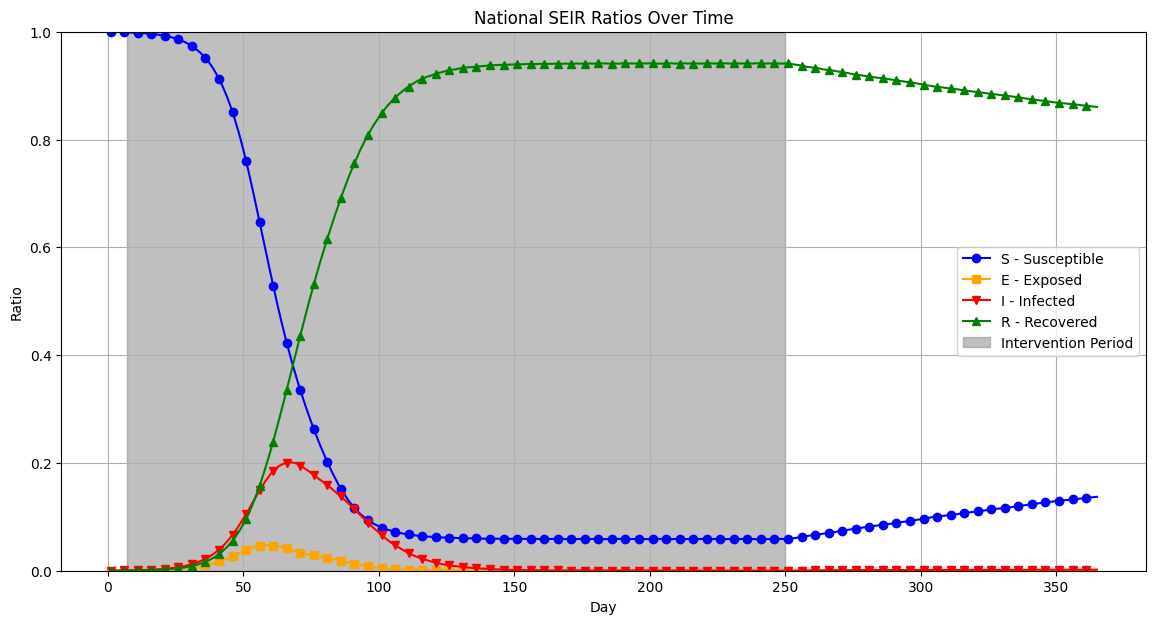

In [28]:
seir_plot(method_start=ls, method_end=le, seir_history=lockdown_seir_history)

### 10. Social Distance

In [29]:
Tmax = 365

α = 0.60  # Transmission rate
β = 0.20  # Recovery rate
γ = 0.30  # Progression rate from exposed to infectious

ss = 10 # Social distance start day
se = 100 # Social distance end day

social_seir_history = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, inbound, community_seir)
    if ss <= day <= se:
        social_volume = volume_matrix * 0.5
        social_α = α * 0.5 
        community_seir, migration_df = migration(community_seir, binary_matrix, social_volume)
        community_seir = infection(social_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix)
        community_seir = infection(α, β, γ, community_seir)
    print(migration_df)
    social_seir_history[day] = community_seir

                       S_out  E_out  I_out  R_out  S_in  E_in  I_in  R_in
Outside World            187     20      0      0     0     0     0     0
Aana Alofi              3485      5      0      0  3677    20     0     0
Aiga i le Tai           2440      0      0      0  2440     0     0     0
Alataua i Sisifo         478      0      0      0   478     0     0     0
Aleipata Itupa i Lalo    438      0      0      0   438     0     0     0
Aleipata Itupa i Luga    428      0      0      0   428     0     0     0
Anoamaa                 1837      0      0      0  1837     0     0     0
Faasaleleaga            2975      0      0      0  2975     0     0     0
Falealili                717      0      0      0   717     0     0     0
Falealupo                352      0      0      0   352     0     0     0
Faleata                 9343      0      0      0  9342     1     0     0
Falelatai & Samatau     1040      0      0      0  1040     0     0     0
Gagaemauga               991      0   

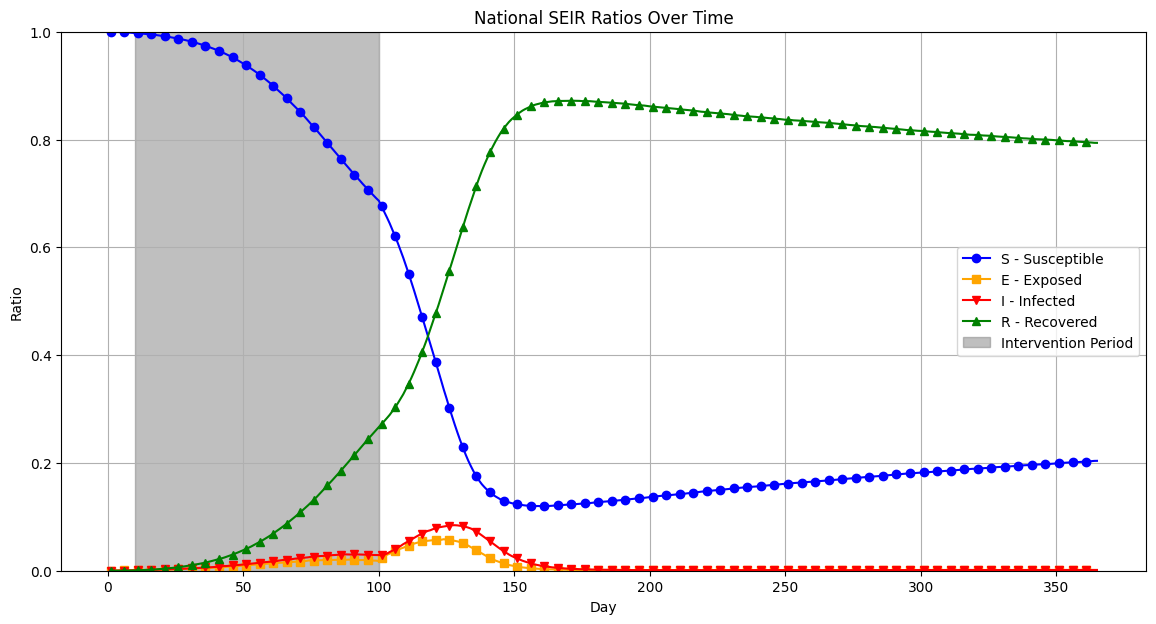

In [30]:
1

### 11. Work From Home

In [31]:
Tmax = 365

α = 0.60  # Transmission rate
β = 0.20  # Recovery rate
γ = 0.30  # Progression rate from exposed to infectious

ws = 10 # Work from home start day
we = 200 # Work from home end day
work_seir_history = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, inbound, community_seir)
    if ws <= day <= we:
        work_volume = volume_matrix * 0.2
        #social_α = α * 0.5
        community_seir, migration_df = migration(community_seir, binary_matrix, work_volume)
        #community_seir = infection(social_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix)
    community_seir = infection(α, β, γ, community_seir)
    print(migration_df)
    work_seir_history[day] = community_seir

                       S_out  E_out  I_out  R_out  S_in  E_in  I_in  R_in
Outside World            242     26      0      0     0     0     0     0
Aana Alofi              3488      2      0      0  3732    26     0     0
Aiga i le Tai           2440      0      0      0  2439     1     0     0
Alataua i Sisifo         478      0      0      0   478     0     0     0
Aleipata Itupa i Lalo    438      0      0      0   438     0     0     0
Aleipata Itupa i Luga    428      0      0      0   428     0     0     0
Anoamaa                 1837      0      0      0  1837     0     0     0
Faasaleleaga            2975      0      0      0  2975     0     0     0
Falealili                717      0      0      0   717     0     0     0
Falealupo                352      0      0      0   352     0     0     0
Faleata                 9343      0      0      0  9343     0     0     0
Falelatai & Samatau     1040      0      0      0  1040     0     0     0
Gagaemauga               991      0   

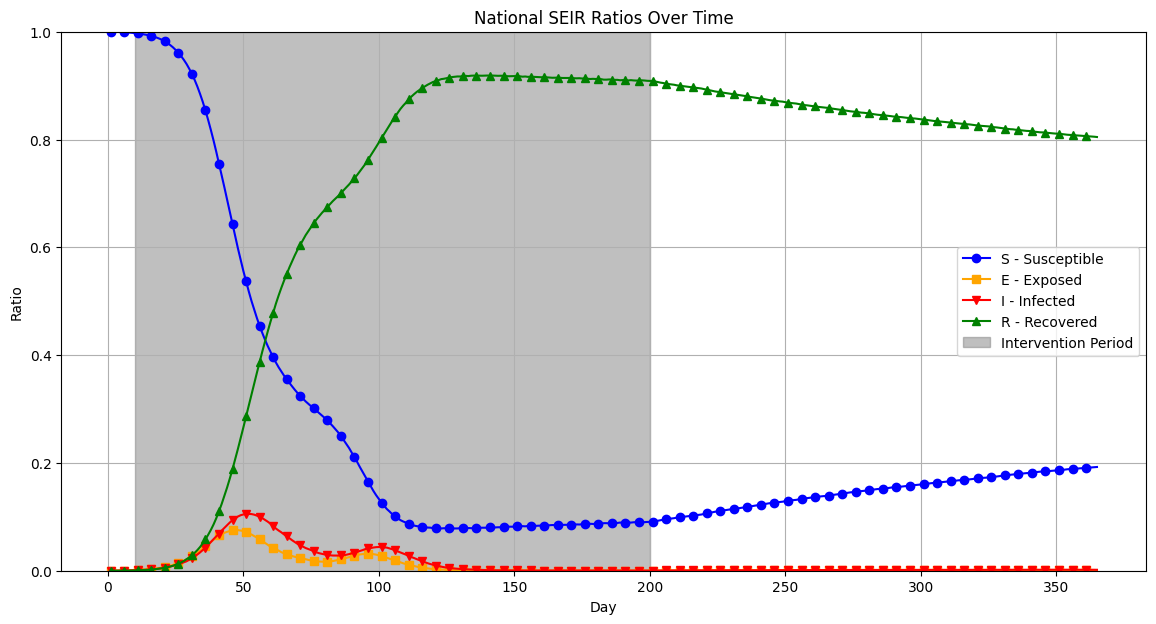

In [32]:
seir_plot(method_start=ws, method_end=we, seir_history=work_seir_history)

### 12. Face Mask

In [33]:
Tmax = 365

α = 0.60  # Transmission rate
β = 0.20  # Recovery rate
γ = 0.30  # Progression rate from exposed to infectious

ms = 10 # Social distance start day
me = 200 # Social distance end day

mask_seir_history = {}

community_seir = community.copy()
inbound = [200, 400,0.1] # expose_rate = 0.1

#day =1
for day in range(1, Tmax + 1):
    community_seir = seir_statement(day, inbound, community_seir)
    if ms <= day <= me:
        mask_α = α * (1 - 0.7)
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix)
        community_seir = infection(mask_α, β, γ, community_seir)
    else:
        community_seir, migration_df = migration(community_seir, binary_matrix, volume_matrix)
        community_seir = infection(α, β, γ, community_seir)
    print(migration_df)
    mask_seir_history[day] = community_seir

                       S_out  E_out  I_out  R_out  S_in  E_in  I_in  R_in
Outside World            237     26      0      0     0     0     0     0
Aana Alofi              3486      4      0      0  3726    27     0     0
Aiga i le Tai           2440      0      0      0  2440     0     0     0
Alataua i Sisifo         478      0      0      0   478     0     0     0
Aleipata Itupa i Lalo    438      0      0      0   438     0     0     0
Aleipata Itupa i Luga    428      0      0      0   428     0     0     0
Anoamaa                 1837      0      0      0  1837     0     0     0
Faasaleleaga            2975      0      0      0  2975     0     0     0
Falealili                717      0      0      0   717     0     0     0
Falealupo                352      0      0      0   352     0     0     0
Faleata                 9343      0      0      0  9343     0     0     0
Falelatai & Samatau     1040      0      0      0  1040     0     0     0
Gagaemauga               991      0   

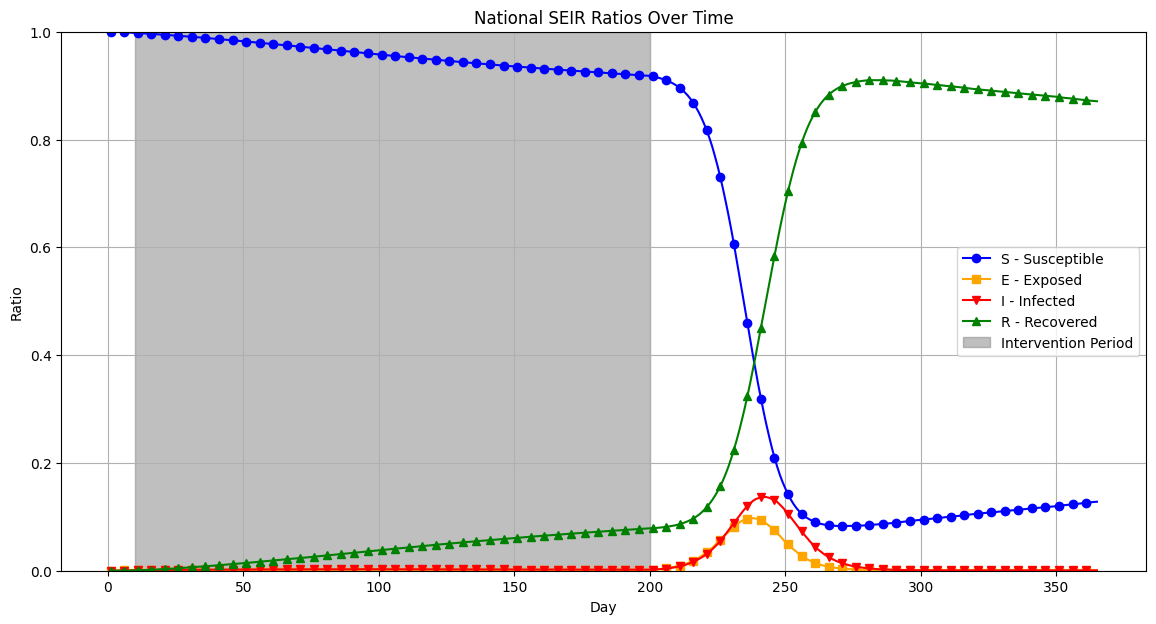

In [34]:
seir_plot(method_start=ms, method_end=me, seir_history=mask_seir_history)